In [91]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
from collections import Counter
import operator
import numpy as np
import nltk
from textblob import TextBlob

In [35]:
path = r"Data\consumer_complaint_full.csv"

In [37]:
full_data = pd.read_csv(path)
data = full_data[["Consumer complaint narrative", "Product"]]
data.dropna(inplace=True)
data.columns = ["X", "y"]
data["X"][1]

C:\Users\eakhumb\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'When my loan was switched over to Navient i was never told that i had a deliquint balance because with XXXX i did not. When going to purchase a vehicle i discovered my credit score had been dropped from the XXXX into the XXXX. I have been faithful at paying my student loan. I was told that Navient was the company i had delinquency with. I contacted Navient to resolve this issue you and kept being told to just contact the credit bureaus and expalin the situation and maybe they could help me. I was so angry that i just hurried and paid the balance off and then after tried to dispute the delinquency with the credit bureaus. I have had so much trouble bringing my credit score back up.'

In [38]:
stopwords_set = set(stopwords.words('english'))
stopwords_set.add('xxxx')
custom = list(stopwords_set)+list(punctuation)+['``', "'s", "...", "n't"]

In [79]:
first_five_complaints = data.iloc[0:5]["X"]
BoW = first_five_complaints.str.lower()
BoW = [word_tokenize(item) for item in BoW]
BoW = [item for sublist in BoW for item in sublist]
BoW = [item for item in BoW if item not in custom]

In [80]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\eakhumb\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
lemmatizer = WordNetLemmatizer()
BoW = [lemmatizer.lemmatize(item) for item in BoW]

In [82]:
BoW_dict = Counter(BoW)

In [83]:
sorted_d = sorted(BoW_dict.items(), key=operator.itemgetter(1), reverse=True)

In [84]:
sorted(BoW_dict.items(), key=operator.itemgetter(1), reverse=True) == BoW_dict.most_common()

True

In [85]:
sorted_d = BoW_dict.most_common()

In [86]:
len(sorted_d)

322

In [89]:
#Extracting the top 10 words with their count
top_10 = sorted_d[:10]

#Storing only the top 10 words
top_words=[]
for x in top_10:
    top_words.append(x[0])

In [93]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\eakhumb\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [111]:
BoW_joined = " ".join(BoW)
blob = TextBlob(BoW_joined)
tags = blob.tags
nouns = [item[0] for item in tags if item[1]=="NN"]
top_nouns = [item for item in top_words if item in nouns]

In [113]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import gensim
from gensim.models.lsimodel import LsiModel
from gensim import corpora
from pprint import pprint

In [120]:
stop = stopwords_set
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

# Function to lemmatize and remove the stopwords
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = "".join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

# Creating a list of documents from the complaints column
list_of_docs = data["X"].tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [clean(doc).split() for doc in list_of_docs]
print(doc_clean[:2])

[['loan', 'switched', 'navient', 'never', 'told', 'deliquint', 'balance', 'not', 'going', 'purchase', 'vehicle', 'discovered', 'credit', 'score', 'dropped', 'xxxx', 'faithful', 'paying', 'student', 'loan', 'told', 'navient', 'company', 'delinquency', 'with', 'contacted', 'navient', 'resolve', 'issue', 'kept', 'told', 'contact', 'credit', 'bureau', 'expalin', 'situation', 'maybe', 'could', 'help', 'me', 'angry', 'hurried', 'paid', 'balance', 'tried', 'dispute', 'delinquency', 'credit', 'bureau', 'much', 'trouble', 'bringing', 'credit', 'score', 'back', 'up'], ['tried', 'sign', 'spending', 'monitoring', 'program', 'capital', 'one', 'let', 'access', 'account']]


In [143]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
lsimodel = LsiModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
lsimodel.print_topics(5)

[(0,
  '0.351*"xxxxxxxx" + 0.311*"credit" + 0.308*"xxxx" + 0.293*"account" + 0.193*"payment" + 0.142*"report" + 0.139*"bank" + 0.132*"would" + 0.132*"card" + 0.116*"information"'),
 (1,
  '-0.455*"credit" + 0.345*"xxxxxxxx" + -0.298*"consumer" + -0.240*"debt" + -0.234*"report" + -0.225*"agency" + -0.209*"information" + -0.204*"reporting" + -0.160*"collection" + 0.137*"bank"'),
 (2,
  '-0.355*"consumer" + 0.350*"credit" + 0.277*"card" + -0.203*"law" + -0.186*"criminal" + -0.178*"property" + -0.170*"information" + -0.165*"mortgage" + -0.164*"agency" + -0.149*"court"'),
 (3,
  '0.709*"xxxxxxxx" + -0.391*"payment" + -0.252*"loan" + -0.133*"would" + -0.107*"told" + 0.101*"usaa" + 0.101*"inquiry" + -0.088*"pay" + -0.080*"nt" + 0.077*"report"'),
 (4,
  '0.377*"consumer" + -0.290*"credit" + 0.258*"information" + 0.206*"payment" + -0.180*"criminal" + -0.163*"law" + -0.161*"card" + 0.155*"loan" + 0.148*"xxxxxxxx" + -0.148*"property"')]

In [142]:
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim.models.ldamodel import LdaModel

In [144]:
dictionary = corpora.Dictionary(doc_clean)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
ldamodel = LdaModel(corpus=doc_term_matrix, num_topics=5, id2word=dictionary)
ldamodel.print_topics(5)

[(0,
  '0.024*"credit" + 0.018*"xxxx" + 0.011*"account" + 0.009*"debt" + 0.009*"card" + 0.008*"report" + 0.007*"payment" + 0.007*"xxxxxxxx" + 0.007*"loan" + 0.006*"company"'),
 (1,
  '0.022*"account" + 0.017*"credit" + 0.017*"xxxxxxxx" + 0.016*"payment" + 0.013*"report" + 0.011*"xxxx" + 0.008*"information" + 0.008*"would" + 0.006*"time" + 0.006*"received"'),
 (2,
  '0.022*"xxxxxxxx" + 0.015*"credit" + 0.013*"xxxx" + 0.011*"loan" + 0.008*"company" + 0.008*"report" + 0.007*"account" + 0.007*"told" + 0.007*"payment" + 0.006*"called"'),
 (3,
  '0.014*"account" + 0.009*"xxxx" + 0.009*"bank" + 0.008*"credit" + 0.008*"would" + 0.007*"loan" + 0.007*"time" + 0.006*"company" + 0.006*"back" + 0.006*"told"'),
 (4,
  '0.021*"credit" + 0.018*"xxxx" + 0.017*"account" + 0.008*"report" + 0.008*"payment" + 0.008*"loan" + 0.007*"information" + 0.007*"debt" + 0.006*"letter" + 0.006*"xxxxxxxx"')]

In [145]:
from gensim.models.coherencemodel import CoherenceModel

In [146]:
perplexity_lda = ldamodel.log_perplexity(doc_term_matrix)
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
coherence_lda

0.3010307222790952

In [148]:
import numpy as np
import pandas as pd
import re

In [149]:
path = r"Data\news_1.csv"

In [154]:
data = pd.read_csv(path, parse_dates=[0], infer_datetime_format=True)
data = data.sort_values("publish_date")
data.head()

,publish_date,headline_text
286211,2003-02-19,police defend aboriginal tent embassy raid
180156,2003-02-19,talk of asian nuclear arms race unhelpful downer
233845,2003-02-19,taipans placing future in publics hands
170928,2003-02-19,most highly educated live in nsw wa
245529,2003-02-19,six palestinians killed in gaza incursion


In [156]:
data["headline_text"] = data["headline_text"].apply(lambda x: re.sub('[^a-zA-Z]', ' ',x))
data.shape

(331100, 2)

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns
import operator
from sklearn.feature_extraction.text import CountVectorizer

In [158]:
vectorizer = CountVectorizer(stop_words='english', max_features=30000)
news = vectorizer.fit_transform(data["headline_text"])

In [160]:
words = {}
i = 0

In [162]:
sums = np.array(np.sum(news, axis=0)).flatten()

In [168]:
for word in vectorizer.get_feature_names():
    words[word] = sums[i]
    i += 1

In [170]:
top_20 = sorted(words.items(), key=operator.itemgetter(1), reverse=True)[:20]
top_20_words = [i[0] for i in top_20]
top_20_values = [i[1] for i in top_20]

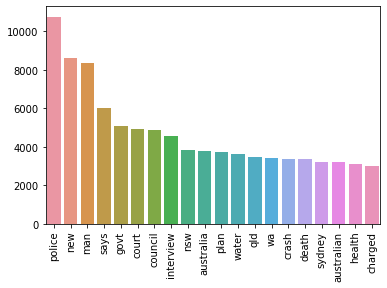

In [174]:
sns.barplot(top_20_words, top_20_values)
plt.xticks(rotation=90)
plt.show()

In [175]:
from sklearn.decomposition import TruncatedSVD, LatentDirichletAllocation
import pprint

In [177]:
n_topics = 5
lsa_model = TruncatedSVD(n_components=n_topics, random_state=2)

In [178]:
lsa_topic_matrix = lsa_model.fit_transform(news)

In [181]:
topic_lsa = {}

In [182]:
for i, topic in enumerate(lsa_model.components_):
    topic_lsa["Topic {}".format(i)] = [(vectorizer.get_feature_names()[i] + '*' + str(topic[i])) for i in topic.argsort()[:-11:-1]]

In [186]:
for key, value in topic_lsa.items():
    topic_lsa[key] = ' + '.join(value)

In [190]:
pprint.pprint(topic_lsa)

{'Topic 0': 'police*0.8601893055234295 + man*0.37687390961080647 + '
            'new*0.1227185188122029 + court*0.0872544186581951 + '
            'charged*0.07895772747439257 + murder*0.07057005753940102 + '
            'car*0.06800066168033368 + crash*0.06584004218945001 + '
            'death*0.06572026639969192 + missing*0.06449235428724634',
 'Topic 1': 'man*0.7879343660155153 + new*0.19216278977477838 + '
            'court*0.18899897199945292 + charged*0.1646580164334982 + '
            'murder*0.09487034753363109 + accused*0.06813694764641672 + '
            'dies*0.06019737315016951 + jailed*0.0531972092346729 + '
            'guilty*0.048466720132487824 + face*0.045142516613166025',
 'Topic 2': 'new*0.9359950198542549 + says*0.07749707449614404 + '
            'council*0.07207682180023704 + govt*0.07006061280055104 + '
            'plan*0.04296865252560815 + zealand*0.04093995686187963 + '
            'australia*0.036570064044717514 + laws*0.03483920048765268 + '
           

In [191]:
import nltk
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.utils import simple_preprocess
from nltk import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem.wordnet import WordNetLemmatizer
import string
import matplotlib.pyplot as plt

In [192]:
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join(ch for ch in stop_free if ch not in exclude)
    normalized = " ".join(lemma.lemmatize(word) for word in punc_free.split())
    return normalized

In [193]:
lda_model= set(stopwords.words('english'))
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

headlines = data["headline_text"].tolist()

In [208]:
clean_headlines = [clean(row).split() for row in headlines]
dictionary = corpora.Dictionary(clean_headlines)
doc_term_matrix = [dictionary.doc2bow(doc) for doc in clean_headlines]

In [210]:
lda_model = LdaModel(doc_term_matrix, num_topics=5, id2word = dictionary, random_state=2, iterations=10)

In [212]:
topics = lda_model.print_topics(5, 10)

In [213]:
pprint.pprint(topics)

[(0,
  '0.013*"australia" + 0.011*"south" + 0.011*"adelaide" + 0.009*"election" + '
  '0.009*"first" + 0.008*"new" + 0.008*"council" + 0.008*"open" + 0.008*"take" '
  '+ 0.007*"turnbull"'),
 (1,
  '0.014*"new" + 0.013*"wa" + 0.013*"nsw" + 0.012*"government" + 0.011*"call" '
  '+ 0.011*"queensland" + 0.010*"say" + 0.008*"canberra" + 0.008*"sa" + '
  '0.008*"school"'),
 (2,
  '0.017*"man" + 0.016*"police" + 0.015*"woman" + 0.010*"death" + '
  '0.010*"world" + 0.010*"sydney" + 0.008*"perth" + 0.008*"day" + 0.008*"one" '
  '+ 0.008*"year"'),
 (3,
  '0.017*"trump" + 0.015*"u" + 0.014*"say" + 0.012*"child" + 0.012*"melbourne" '
  '+ 0.008*"australian" + 0.008*"australia" + 0.007*"donald" + 0.007*"china" + '
  '0.007*"interview"'),
 (4,
  '0.012*"court" + 0.009*"murder" + 0.009*"sex" + 0.008*"market" + '
  '0.008*"family" + 0.008*"change" + 0.007*"help" + 0.007*"australian" + '
  '0.006*"job" + 0.006*"cut"')]


In [214]:
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_headlines, dictionary=dictionary, coherence='c_v')

In [215]:
coherence_lda = coherence_model_lda.get_coherence()

In [216]:
coherence_lda

0.2817006151285487

In [220]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    coherence_values = []
    model_list = []
    for i in range(start, limit, step):
        model = gensim.models.ldamodel.LdaModel(doc_term_matrix, num_topics=i, random_state=2, id2word=dictionary, iterations=10)
        model_list.append(model)
        coherence_model = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherence_model.get_coherence())
    return model_list, coherence_values

In [221]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_matrix, texts=clean_headlines, start=2, limit=50, step=6)

In [222]:
x = [i for i in range(2, 50, 6)]

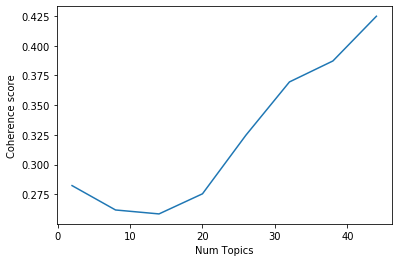

In [225]:
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.show()